In [2]:
 #Import Required Libraries
# =========================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For better visualization aesthetics
plt.style.use("ggplot")

In [3]:
#Load Dataset
# =========================================================
# Replace with your uploaded dataset path in Colab (mounted via files.upload())
df = pd.read_csv("/content/retail_sales_dataset.csv")

# Display first few rows
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [11]:
 #Problem Definition & Objectives
# =========================================================
problem_definition = """
Retail companies collect a lot of transactional data, but struggle to
convert it into actionable insights.

Objectives of this project:
1. Identify customer buying patterns
2. Discover popular products
3. Detect seasonal sales trends
4. Provide recommendations for inventory & marketing
"""
print(problem_definition)


Retail companies collect a lot of transactional data, but struggle to 
convert it into actionable insights. 

Objectives of this project:
1. Identify customer buying patterns
2. Discover popular products
3. Detect seasonal sales trends
4. Provide recommendations for inventory & marketing



In [10]:
#Data Overview & Sources
# =========================================================
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())

print("\nColumns:", df.columns.tolist())

Dataset Shape: (1000, 9)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB
None

Columns: ['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age', 'Product Category', 'Quantity', 'Price per Unit', 'Total Amount']


In [7]:
#Data Cleaning & Preparation
# =========================================================

# Check for missing values
print("Missing Values per Column:")
print(df.isnull().sum())

# Fill or drop missing values depending on business case
df = df.dropna()  # (or use fillna if appropriate)

# Check for duplicates
print("Duplicate Rows:", df.duplicated().sum())
df = df.drop_duplicates()

# Convert date column (if exists) to datetime
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['day'] = df['date'].dt.day


Missing Values per Column:
Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64
Duplicate Rows: 0


In [9]:
 #Data Exploration & Summarization
# =========================================================

# Summary statistics
print("Statistical Summary:")
print(df.describe(include="all"))

# Example aggregations
if 'sales' in df.columns and 'product' in df.columns:
    sales_summary = df.groupby("product")["sales"].sum().sort_values(ascending=False).head(10)
    print("\nTop 10 Products by Sales:\n", sales_summary)

if 'customer_id' in df.columns:
    print("\nUnique Customers:", df['customer_id'].nunique())

Statistical Summary:
        Transaction ID        Date Customer ID  Gender         Age  \
count      1000.000000        1000        1000    1000  1000.00000   
unique             NaN         345        1000       2         NaN   
top                NaN  2023-05-16    CUST1000  Female         NaN   
freq               NaN          11           1     510         NaN   
mean        500.500000         NaN         NaN     NaN    41.39200   
std         288.819436         NaN         NaN     NaN    13.68143   
min           1.000000         NaN         NaN     NaN    18.00000   
25%         250.750000         NaN         NaN     NaN    29.00000   
50%         500.500000         NaN         NaN     NaN    42.00000   
75%         750.250000         NaN         NaN     NaN    53.00000   
max        1000.000000         NaN         NaN     NaN    64.00000   

       Product Category     Quantity  Price per Unit  Total Amount  
count              1000  1000.000000     1000.000000   1000.000000  


**Data Visualization**


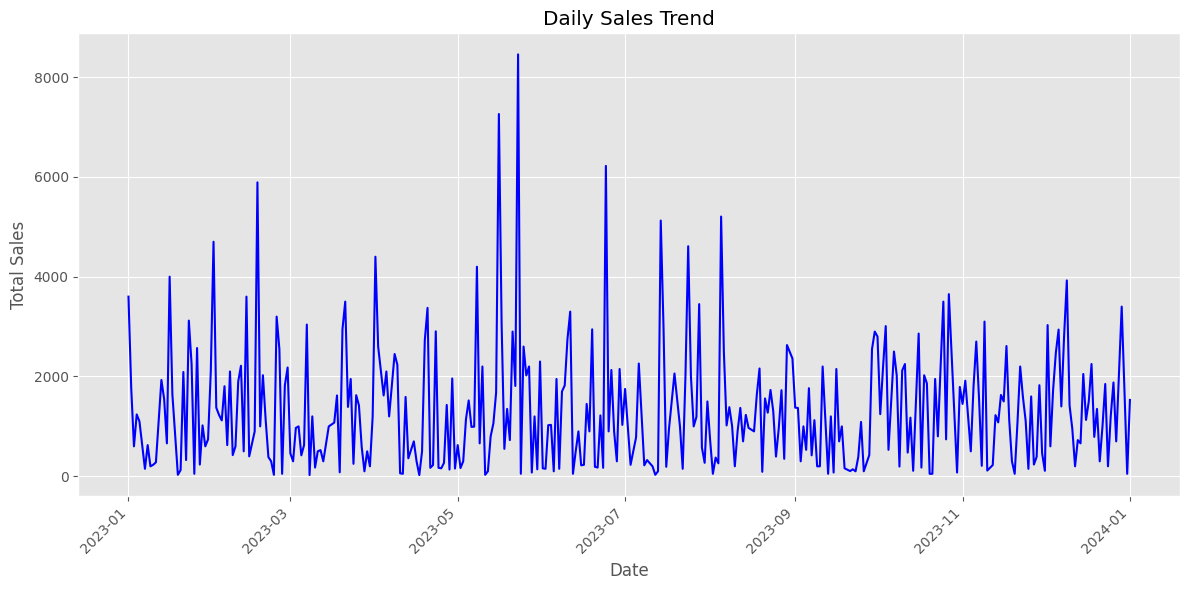

/tmp/ipython-input-1760822543.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_sales.index, y=monthly_sales.values, palette="coolwarm")


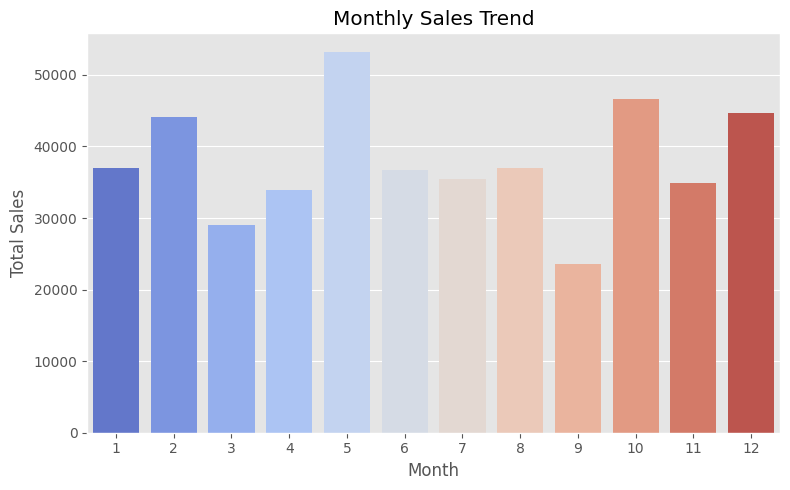

/tmp/ipython-input-1760822543.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_sales.values, y=product_sales.index, palette="Blues_r")


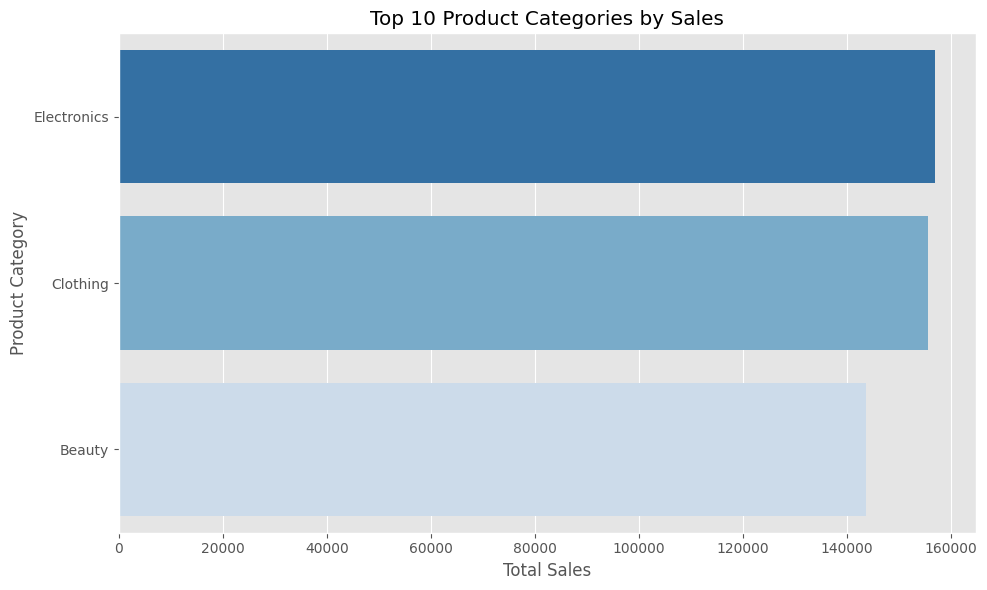

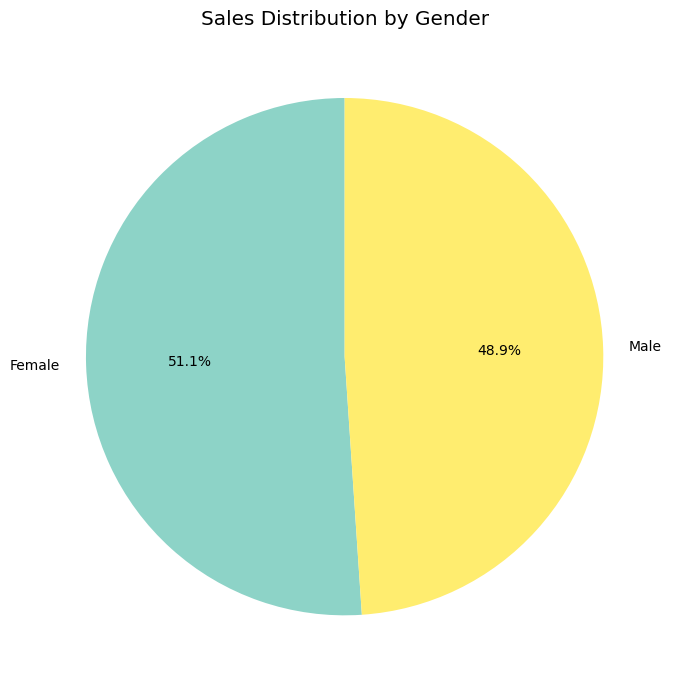

/tmp/ipython-input-1760822543.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=customer_freq.values, y=customer_freq.index, palette="viridis")


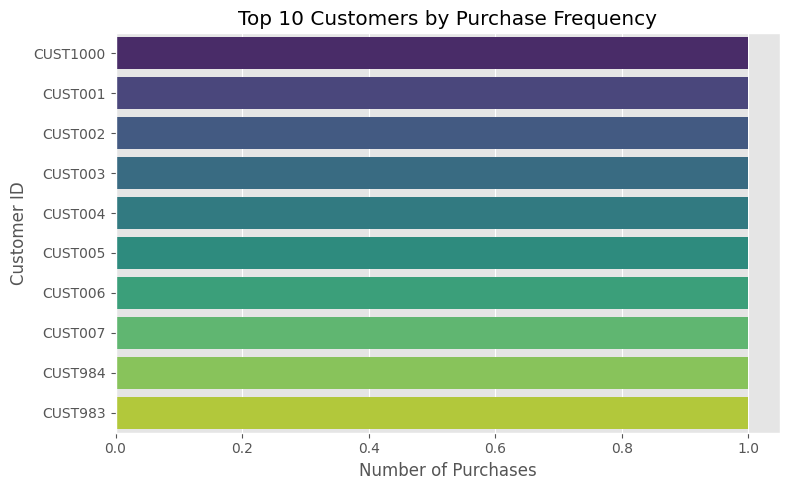

In [19]:
# =========================================================
#Data Visualization
# =========================================================

# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# 1. Daily Sales Trend
plt.figure(figsize=(12,6))
daily_sales = df.groupby("Date")["Total Amount"].sum()
daily_sales.plot(color="blue")
plt.title("Daily Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Monthly Sales Trend
df['Month'] = df['Date'].dt.month
plt.figure(figsize=(8,5))
monthly_sales = df.groupby("Month")["Total Amount"].sum()
sns.barplot(x=monthly_sales.index, y=monthly_sales.values, palette="coolwarm")
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()

# 3. Top 10 Product Categories by Sales
plt.figure(figsize=(10,6))
product_sales = df.groupby("Product Category")["Total Amount"].sum().sort_values(ascending=False).head(10)
sns.barplot(x=product_sales.values, y=product_sales.index, palette="Blues_r")
plt.title("Top 10 Product Categories by Sales")
plt.xlabel("Total Sales")
plt.ylabel("Product Category")
plt.tight_layout()
plt.show()

# 4. Gender-wise Sales Distribution
plt.figure(figsize=(7,7))
gender_sales = df.groupby("Gender")["Total Amount"].sum()
gender_sales.plot(kind="pie", autopct='%1.1f%%', startangle=90, cmap="Set3")
plt.title("Sales Distribution by Gender")
plt.ylabel("")
plt.tight_layout()
plt.show()

# 5. Top 10 Customers by Purchase Frequency
plt.figure(figsize=(8,5))
customer_freq = df['Customer ID'].value_counts().head(10)
sns.barplot(x=customer_freq.values, y=customer_freq.index, palette="viridis")
plt.title("Top 10 Customers by Purchase Frequency")
plt.xlabel("Number of Purchases")
plt.ylabel("Customer ID")
plt.tight_layout()
plt.show()


In [20]:
# =========================================================
#Insights & Interpretation
# =========================================================

insights = []

# Best-selling product category
best_product = df.groupby("Product Category")["Total Amount"].sum().idxmax()
insights.append(f"🔹 Best-selling product category: {best_product}")

# Peak sales month
best_month = df.groupby("Month")["Total Amount"].sum().idxmax()
insights.append(f"🔹 Peak sales month: {best_month}")

# Highest spending customer
top_customer = df.groupby("Customer ID")["Total Amount"].sum().idxmax()
insights.append(f"🔹 Highest spending customer ID: {top_customer}")

# Gender that spends more
top_gender = df.groupby("Gender")["Total Amount"].sum().idxmax()
insights.append(f"🔹 Gender with higher sales: {top_gender}")

# Average daily sales
avg_daily_sales = df.groupby("Date")["Total Amount"].sum().mean()
insights.append(f"🔹 Average daily sales: {round(avg_daily_sales,2)}")

print("📊 Key Insights & Interpretations:")
for i in insights:
    print(i)


📊 Key Insights & Interpretations:
🔹 Best-selling product category: Electronics
🔹 Peak sales month: 5
🔹 Highest spending customer ID: CUST015
🔹 Gender with higher sales: Female
🔹 Average daily sales: 1321.74


In [22]:
# =========================================================
#Conclusion & Recommendations
# =========================================================

conclusion = """
✅ Conclusion & Recommendations:
1. Focus marketing on the best-selling product categories to maximize profit.
2. Align campaigns around the peak sales month to capture seasonal demand.
3. Reward high-spending customers with loyalty programs or exclusive offers.
4. Gender-based segmentation can improve targeted advertising effectiveness.
5. Maintain sufficient stock levels using average daily sales as a benchmark.
"""

print(conclusion)



✅ Conclusion & Recommendations:
1. Focus marketing on the best-selling product categories to maximize profit.
2. Align campaigns around the peak sales month to capture seasonal demand.
3. Reward high-spending customers with loyalty programs or exclusive offers.
4. Gender-based segmentation can improve targeted advertising effectiveness.
5. Maintain sufficient stock levels using average daily sales as a benchmark.

